# Signals and Systems for Dummies, Chapter 5

## Convolving rectangular/triangular pulses

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [6]:
def create_rect_pulse(amp, offset, tau, t):
    """
    r = amp*pi((t-offset)/tau)

    """
    r = np.zeros_like(t)
    r[(t > offset-tau/2) & (t <= offset+tau/2)] = amp
    return r

In [45]:
step = 0.005
t = np.arange(0, 10, step)
x = create_rect_pulse(2, 3.5, 1, t)
# x = create_rect_pulse(2, 3.5, 1, t)*(t-3)
h = create_rect_pulse(1, 1, 2, t)
c = signal.convolve(x, h, method="direct")*step

Text(0.5, 1.0, 'Finite Extent Signal - Convolution Example')

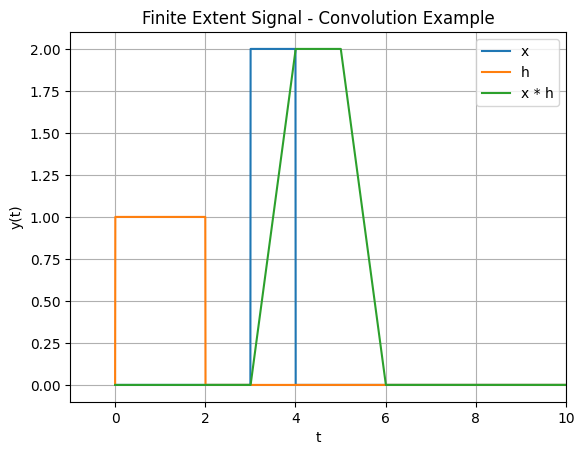

In [ ]:
fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="x")
ax.plot(t, h, label="h")
t_c = np.arange(0, step*len(c), step)
t_c = t_c[:len(c)]
ax.plot(t_c, c, label="x * h")
ax.grid()
ax.legend()
ax.set_xlim(right=10)
ax.set_ylabel("y(t)")
ax.set_xlabel("t")
ax.set_title("Finite Extent Signal - Convolution Example")

## Convolving with exponential decay

In [7]:
step = 0.005
t = np.arange(0, 20, step)
h = np.exp(-1*t)
T = 1
x1 = create_rect_pulse(1, T/2, T, t)
c1 = signal.convolve(x1, h, method="direct")*step
T = 5
x2 = create_rect_pulse(1, T/2, T, t)
c2 = signal.convolve(x2, h, method="direct")*step
T = 10
x3 = create_rect_pulse(1, T/2, T, t)
c3 = signal.convolve(x3, h, method="direct")*step

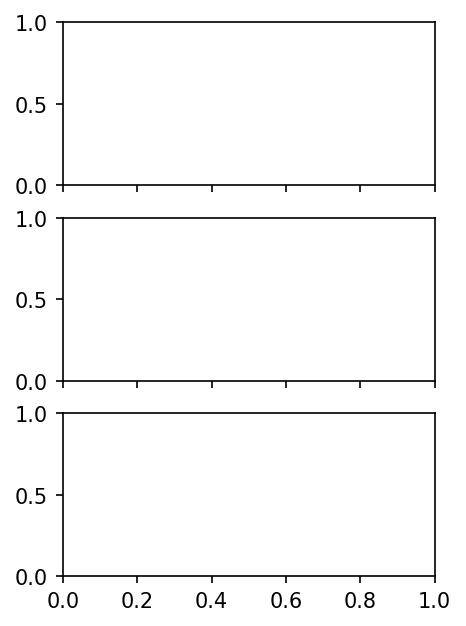

In [13]:
fig, axs = plt.subplots(nrows=3, sharex=True, dpi=150, figsize=(3.2, 4.8)) 

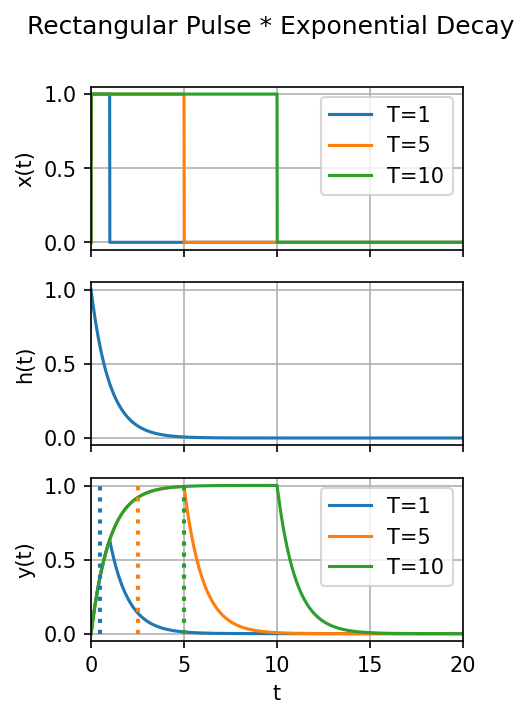

In [17]:
fig, axs = plt.subplots(nrows=3, sharex=True, dpi=150, figsize=(3.2, 4.8))
axs[0].plot(t, x1, label="T=1")
axs[0].plot(t, x2, label="T=5")
axs[0].plot(t, x3, label="T=10")
axs[0].set_ylabel("x(t)")
axs[0].legend()

axs[1].plot(t, h)
axs[1].set_ylabel("h(t)")

t_c = np.arange(0, step*len(c1), step)
t_c = t_c[:len(c1)]
axs[2].plot(t_c, c1, label="T=1")
axs[2].plot(t_c, c2, label="T=5")
axs[2].plot(t_c, c3, label="T=10")
axs[2].set_ylabel("y(t)")
axs[2].set_xlabel("t")
axs[2].set_xlim(left=0, right=20)
axs[2].legend()
colors = rcParams["axes.prop_cycle"].by_key()["color"]
axs[2].vlines([0.5, 2.5, 5], ymin=0, ymax=1, colors=colors[:3], linestyles="dotted", linewidth=2)

fig.suptitle("Rectangular Pulse * Exponential Decay")

for ax in axs:
    ax.grid()
#     ax.legend()

## Convolving sinusoid and rectangular pulse

In [74]:
step = 0.001
t = np.arange(0, 20, step)
T = 3/4
h = create_rect_pulse(1/T, T/2, T, t)
x = np.sin(2*np.pi*t)
c = signal.convolve(x, h, method="direct")*step

Text(0.5, 1.0, 'Sinusoid * Rectangle Pulse')

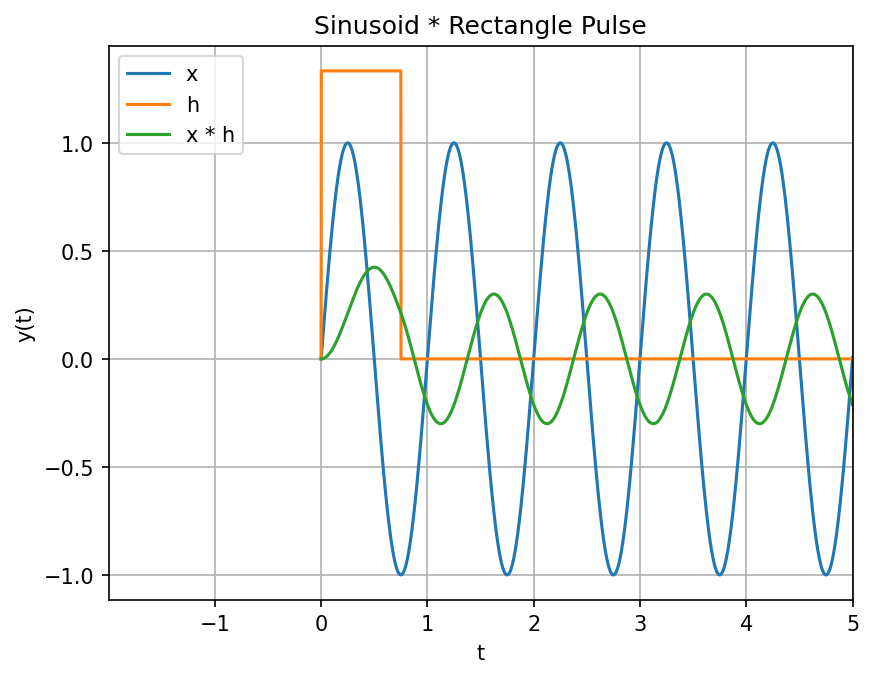

In [76]:
fig, ax = plt.subplots(dpi=150)
t_c = np.arange(0, step*len(c), step)
t_c = t_c[:len(c)]
ax.plot(t, x, label="x")
ax.plot(t, h, label="h")
ax.plot(t_c, c, label="x * h")
ax.set_xlim(right=5)
ax.grid()
ax.legend()
ax.set_ylabel("y(t)")
ax.set_xlabel("t")
ax.set_title("Sinusoid * Rectangle Pulse")